Importing libraries

In [163]:
import csv as csv
import math as math
import random as random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


Defining Global Variables

In [164]:

class Global_V:
    Input_layer_no  = 2
    Hidden_layer_no = 2
    Output_layer_no = 2
    D_Weight_I_H = 0 
    D_Weight_H_O = 0
    Error = 0
    RMSE_Validation=[]
    Alpha_value = 0.2 #Momentum
    Lambda_value = 0.6 #
    Learning_Rate=0.1 #learning rate initialization 0.1
    Epoch_value = 100
    RMSE_List = []

        

Neural Network Class

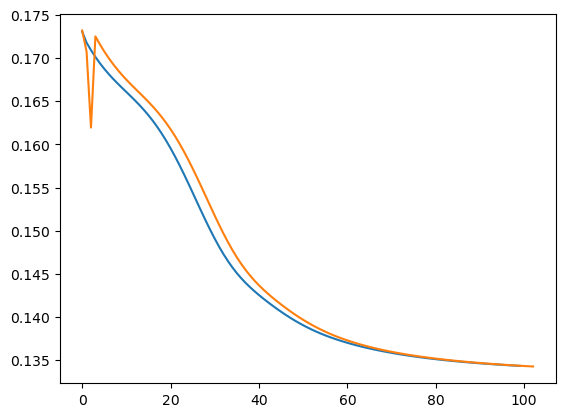

In [169]:
class NeuralNetwork:
    
    def __init__(self):
        self.weights_I_H = np.random.randn(Global_V.Input_layer_no,Global_V.Hidden_layer_no)   #input to hidden layer weight initialization
        self.weights_H_O = np.random.randn(Global_V.Hidden_layer_no,Global_V.Hidden_layer_no)
        self.bias_I_H = np.zeros((1,Global_V.Hidden_layer_no))
        self.bias_H_O = np.zeros((1,Global_V.Output_layer_no))
        
    def data_Normalization(self):
       
        self.column_names=["x1","y1","vel_x1","vel_y1"]
        self.dataframe = pd.read_csv("../dataset/new_50000.csv",names=self.column_names,header=None)

        self.columns_to_normalize = ['x1', 'y1', 'vel_x1','vel_y1']

        for i in self.columns_to_normalize:
            
            self.dataframe[i] = (self.dataframe[i] - self.dataframe[i].min()) / (self.dataframe[i].max() - self.dataframe[i].min())

        self.dataframe.to_csv('xxx345.csv', index=False)
        self.input_columns = self.dataframe[['x1','y1']].values
        self.output_columns = self.dataframe[['vel_x1','vel_y1']].values

        # print(self.input_columns)
        # print(self.output_columns) 


  # Activation Function
    def activation_function(self,param):
        return 1.0 / (1.0 + np.exp(-param))
  #Derivative of Sigmoid  Function
    def derivative_activation_function(self,param): #Sigmoid Derivative Function
        return param * (1 - param)
  
  ##### Forward Propagation
    def forwardProp(self,param):
        self.Neural1 = np.dot(param,self.weights_I_H.T) + self.bias_I_H 
        self.Hidden1 = self.activation_function(self.Neural1)
        self.Neural2 = np.dot(self.Hidden1,self.weights_H_O.T) + self.bias_H_O
        self.Hidden2 = self.activation_function(self.Neural2)
        return self.Hidden2
    
  ##### Back Propagation

    def backwardProp(self,input_columns,output_columns):
        
        # Error Calculations Predicted- actual
        Global_V.Error = self.Hidden2 - output_columns
        
        #######################Delta  Calculation at Output Layer############
        delta_val_Output_Layer = Global_V.Error*(self.derivative_activation_function(self.Hidden2)*Global_V.Lambda_value)
        Global_V.D_Weight_H_O  = Global_V.Learning_Rate * np.dot(delta_val_Output_Layer.T,self.Hidden1) + Global_V.Alpha_value * Global_V.D_Weight_H_O
        
        ######################'''''''''''''''Deltas at Hidden Layer ''''''''''''''''#####################

        error_val_Hidden_Layer = np.dot( delta_val_Output_Layer, self.weights_H_O)

        delta_val_Hidden_Layer = error_val_Hidden_Layer*(self.derivative_activation_function(self.Hidden1)*Global_V.Lambda_value)

        Global_V.D_Weight_I_H = Global_V.Learning_Rate * np.dot(delta_val_Hidden_Layer.T,input_columns)+Global_V.Alpha_value*Global_V.D_Weight_I_H


        ##################### Weight and Bias update at Hidden Layer##########################
        self.weights_H_O = self.weights_H_O - Global_V.Learning_Rate * Global_V.D_Weight_H_O 
            
        self.bias_H_O = self.bias_H_O - np.sum(delta_val_Output_Layer,axis = 0) * Global_V.Learning_Rate

        ##################### Weight and Bias update at Hidden Layer##########################
            
        self.weights_I_H = self.weights_I_H- Global_V.D_Weight_I_H * Global_V.Alpha_value
        self.bias_I_H = self.bias_I_H- np.sum(Global_V.D_Weight_H_O,axis=0) * Global_V.Learning_Rate

        # print("Self Bias", self.bias_I_H)

#####'''''''''''''' Training - Validation - Test ''''''''############
#   def split_data(data, split_ratio):
#         split_index = int(len(data) * split_ratio)
#         return data[:split_index], data[split_index:]  
# train_data, test_data = NeuralNetwork().self.split_data(data, split_ratio=0.8)
    def Network_Training(self):
        X_Training,X_Validate,Y_Training,Y_Validate = train_test_split(self.input_columns, self.output_columns, test_size=0.8, random_state=1)
        X_Validate,X_Testing,Y_Validate,Y_Testing=train_test_split(self.input_columns, self.output_columns, test_size=0.8, random_state=1)
    
        for i in range(Global_V.Epoch_value):
            self.neural_Training=len(X_Training)
            self.neural_Validate=len(X_Validate)
            self.neural_Testing=len(X_Testing)
            RMSE_Value = []
            RMSE_Validation=[]

            for j in range(self.neural_Training):                 #Training Loop
                self.forwardProp(X_Training[j]) 
                self.backwardProp(X_Training[j].reshape(1,2),Y_Training[j])
                Error_Testing=np.sum(np.abs(Global_V.Error))/2
                RMSE_Value.append(Error_Testing)

            for j in range(self.neural_Validate):               #Validation Loop
                self.forwardProp(X_Validate[j].reshape(1,2))
                Error_Validation  = self.Hidden2 - Y_Validate[j]
                Testing_Error_Validation= np.sum(np.abs(Error_Validation))/2
                RMSE_Validation.append(Testing_Error_Validation)

        

        #######'''''''''RMSE Calculation - Validation''''''########
            print("RMSE VALUE Enters here>>>>>", )
                            
            Error_Validate_summation = sum([k**2 for k in RMSE_Validation])
            RMSE_Value_Validate = np.sqrt(Error_Validate_summation/self.neural_Validate)
            print("RMSE VALUE>>>>>", RMSE_Value_Validate)
            Global_V.RMSE_Validation.append(RMSE_Value_Validate)
            print('RMSE Value =================>>>>',RMSE_Value )

        #######'''''''''RMSE Calculation - Train''''''########
                        
            Error_square= sum([total**2 for total in RMSE_Value])
            RMSE_Each_Epoch=np.sqrt((Error_square)/self.neural_Training)                 
            Global_V.RMSE_List.append(RMSE_Each_Epoch)
            print ('Loss in epoch '+str(i)+': ',RMSE_Each_Epoch)
            
        # for i in range(self.neural_Testing):                #Test Loop
        #     self.forwardProp(X_Testing[i])
        plt.figure(1)  
        plt.plot(Global_V.RMSE_List)                    #RMSE Train
        plt.plot(Global_V.RMSE_Validation)
        
if __name__=='__main__':       
    p1  = NeuralNetwork() #Creating object of the class
    p1.data_Normalization() #Invoking the function to read the game data
    p1.Network_Training() #Training/Validation/Test 
# p1 = NeuralNetwork()
# p1.backwardProp()